In [509]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [510]:
import matplotlib
%matplotlib widget
matplotlib.rcParams['figure.figsize'] = [12, 5]

In [583]:
file_name = "sample_24"

In [584]:
df = pd.read_csv(f"dataset_slippage/raw/{file_name}.csv")

<Axes: xlabel='time'>

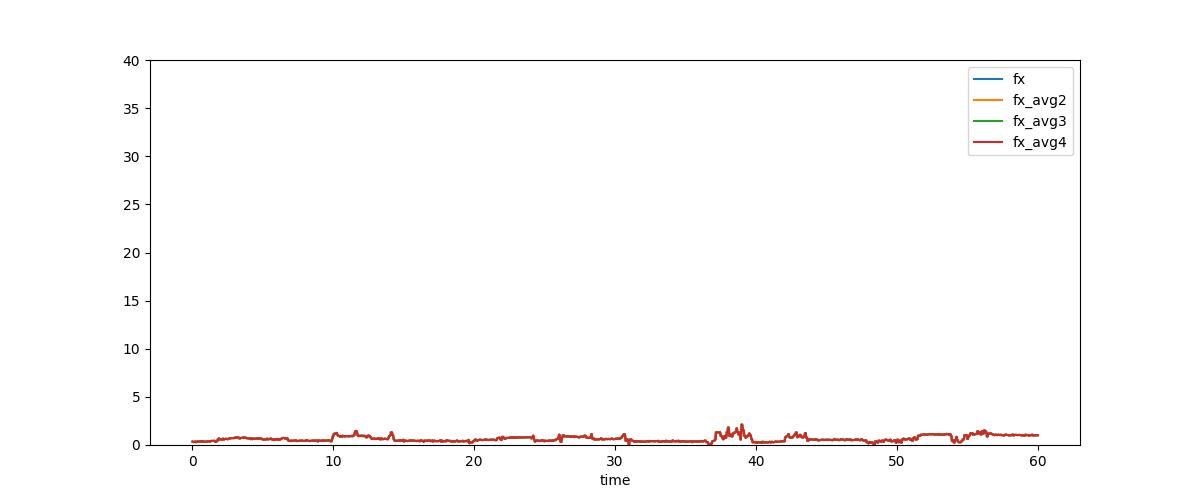

In [585]:
df[["fx", "fx_avg2", "fx_avg3", "fx_avg4", "time"]].plot(x="time", ylim=(0, 40))

<Axes: xlabel='time'>

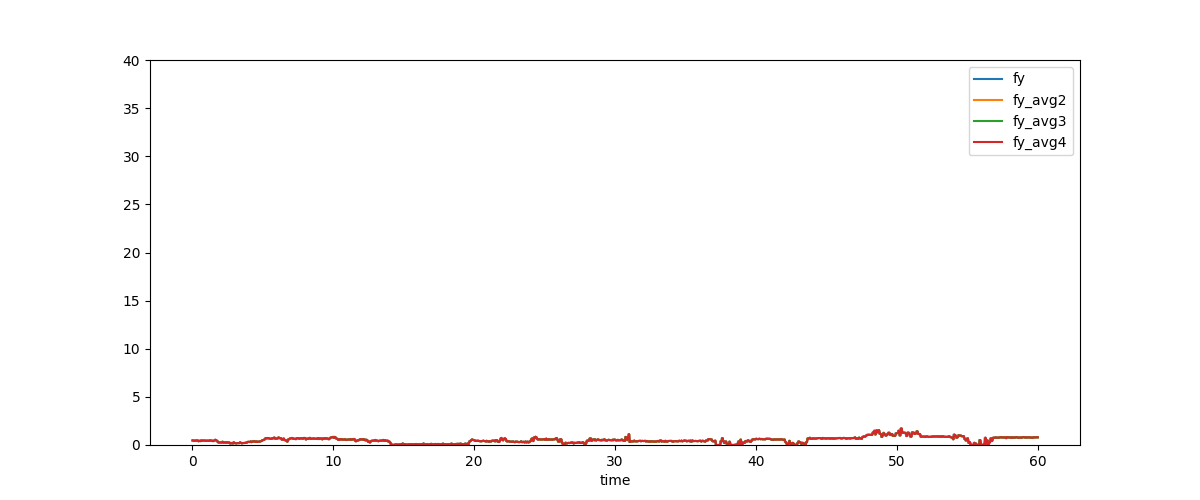

In [586]:
df[["fy", "fy_avg2", "fy_avg3", "fy_avg4", "time"]].plot(x="time", ylim=(0, 40))

<Axes: xlabel='time'>

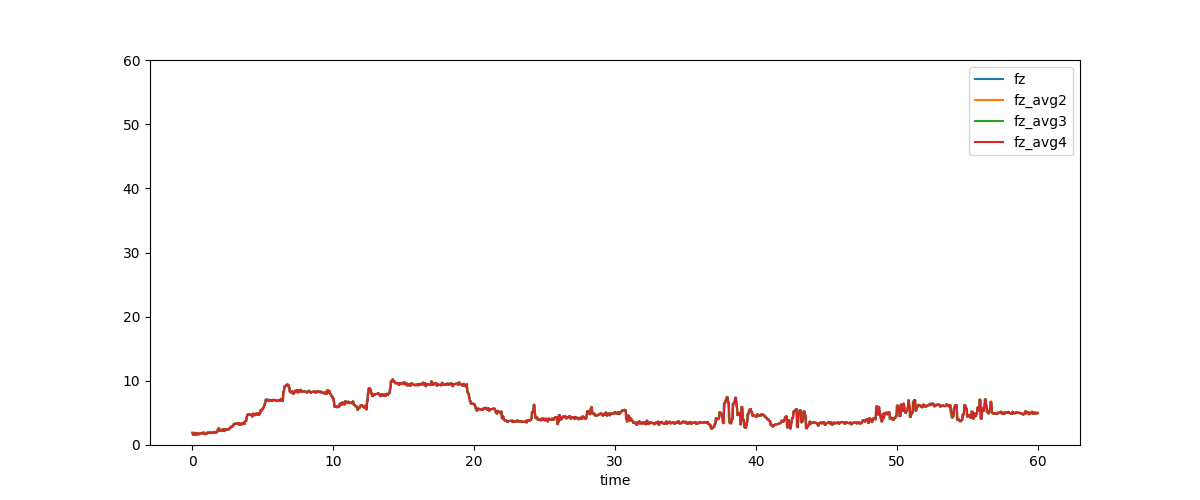

In [587]:
df[["fz", "fz_avg2", "fz_avg3", "fz_avg4", "time"]].plot(x="time", ylim=(0, 60))

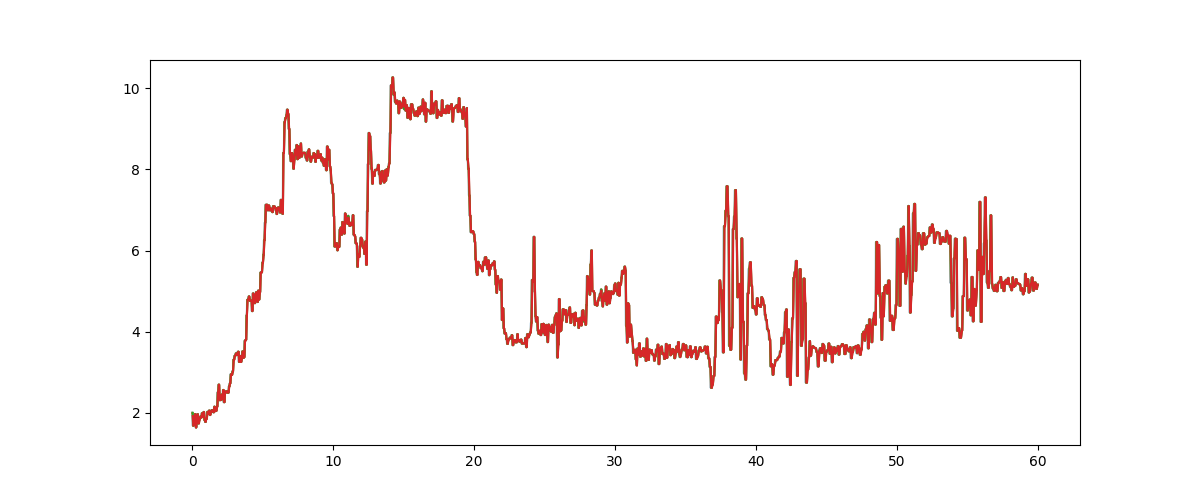

In [589]:
# Segments defined based on the magnitude plot
slipped_segments = []

def mouse_event(event):
    global slipped_segments
    print('x: {} and y: {}'.format(event.xdata, event.ydata))
    slipped_segments.append(event.xdata)

fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', mouse_event)
plt.plot(df["time"], df["mag"])
plt.plot(df["time"], df["mag_avg2"])
plt.plot(df["time"], df["mag_avg3"])
plt.plot(df["time"], df["mag_avg4"])


In [590]:
len(slipped_segments), slipped_segments

(26,
 [1.7474715505686138,
  7.282125098955712,
  9.48179509895571,
  10.688065744117003,
  11.25572251831055,
  12.887735744117,
  13.668263808633133,
  15.229319937665386,
  19.131960260246032,
  20.267273808633128,
  21.331630260246037,
  22.39598671185894,
  23.531300260246027,
  24.808528002181518,
  25.730970260246032,
  26.44054122798797,
  27.43394058282668,
  28.569254131213775,
  30.201267357020228,
  31.691366389278294,
  36.445491873149265,
  44.10885832476217,
  47.58575606669765,
  51.843181873149256,
  53.54615219572991,
  57.16496413121377])

# Select label intervals

In [591]:
# Everything is labeled static at the beginning
df["label"] = "static"
count_start = 0
count_end = 1 
for _ in range(int(len(slipped_segments)/2)):
    print(f"start: {slipped_segments[count_start]} \t end: {slipped_segments[count_end]}")
    start = slipped_segments[count_start]
    end = slipped_segments[count_end]
    count_start += 2
    count_end += 2
    df.loc[(df["time"] >= start) & (df["time"] <= end), "label"] = "slipped"

start: 1.7474715505686138 	 end: 7.282125098955712
start: 9.48179509895571 	 end: 10.688065744117003
start: 11.25572251831055 	 end: 12.887735744117
start: 13.668263808633133 	 end: 15.229319937665386
start: 19.131960260246032 	 end: 20.267273808633128
start: 21.331630260246037 	 end: 22.39598671185894
start: 23.531300260246027 	 end: 24.808528002181518
start: 25.730970260246032 	 end: 26.44054122798797
start: 27.43394058282668 	 end: 28.569254131213775
start: 30.201267357020228 	 end: 31.691366389278294
start: 36.445491873149265 	 end: 44.10885832476217
start: 47.58575606669765 	 end: 51.843181873149256
start: 53.54615219572991 	 end: 57.16496413121377


## Some data cleaning before saving the file

In [592]:
df = df.dropna()

## Insights on label counts

In [593]:
df["label"].value_counts()

label
slipped    2353
static     2075
Name: count, dtype: int64

## Save clean dataframe

In [594]:
selected_columns = ["time", "mag", "mag_avg2", "mag_avg3", "mag_avg4", "label"]

In [595]:
df[selected_columns].to_csv(f"dataset_slippage/clean/clean_{file_name}.csv", index=False)

## Visual Inspection of Final labels

In [596]:
#df = pd.read_csv("dataset_slippage/clean/clean_sample_10.csv")

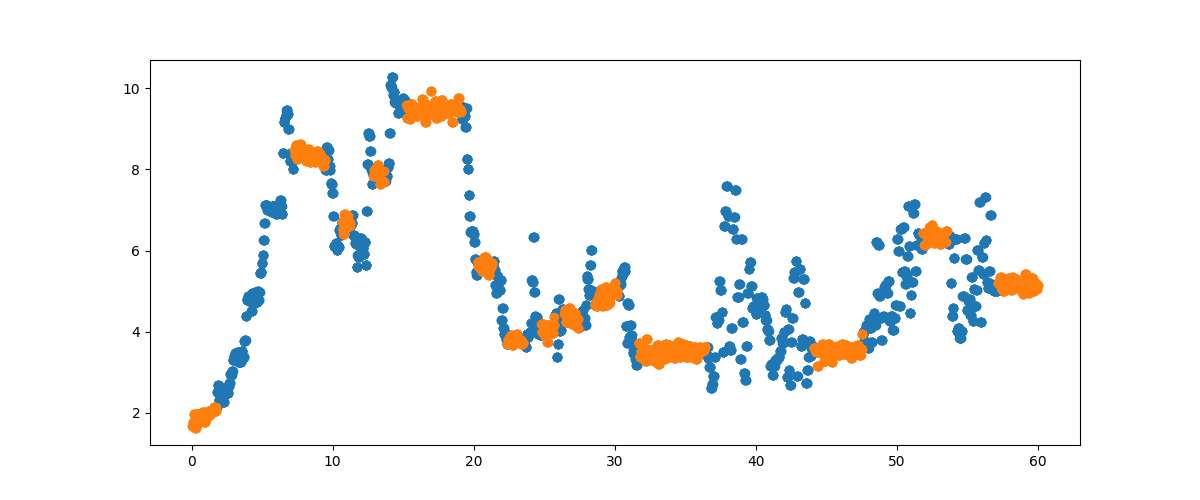

In [597]:
plt.figure()
slipped_df = df[df["label"]=="slipped"]
static_df = df[df["label"]=="static"]
plt.scatter(slipped_df["time"], slipped_df["mag"])
plt.scatter(static_df["time"], static_df["mag"])

In [ ]:
# cada vez que se detecte slippage, despues de ajusatr el gripper
# resetear el contexto(aplicar un sleep de 1 segundo donde se capturan nuevas muestras del sensor) 
# de esta manera evitamos que el detector no se active infinitiamente